In [82]:
import pandas as pd
import numpy as np
import seaborn as sb
import calmap
import os
from matplotlib import pyplot as plt

In [2]:
date = pd.read_excel('date.xlsx')
sales = pd.read_excel('sales_data.xlsx')
date.head()

,timestamp,date,day_name,day_of_month,month_of_year,time_of_day(hh:mm:ss)
0,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
1,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
2,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
3,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
4,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00


In [3]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
timestamp                  541909 non-null datetime64[ns]
date                       541909 non-null datetime64[ns]
day_name                   541909 non-null object
day_of_month               541909 non-null int64
month_of_year              541909 non-null object
time_of_day(hh:mm:ss)      541909 non-null object
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 24.8+ MB


In [4]:
sales.head()

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
transaction id           541909 non-null object
product id               541909 non-null object
product description      540455 non-null object
quantity sold            541909 non-null int64
transaction timestamp    541909 non-null datetime64[ns]
unit price               541909 non-null float64
customer id              406829 non-null float64
transaction country      541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
sales[sales['transaction id'].isin(sales[sales['customer id'].isna()]['transaction id'].tolist())].head()

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


#### Given the sales transaction data we want to assess the performance of the company. Is the company's performance improving or degrading over time? 

In [8]:
sales['transaction timestamp'].min(),sales['transaction timestamp'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [12]:
sales['Month'] = sales['transaction timestamp'].dt.month
sales['Year'] = sales['transaction timestamp'].dt.year

In [13]:
sales['Day'] = sales['transaction timestamp'].dt.day

In [14]:
sales.head()

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country,Month,Year,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,1


In [36]:
a = sales.groupby(['Year','Month'])['quantity sold'].sum()
a

Year  Month
2010  12       342228
2011  1        308966
      2        277989
      3        351872
      4        289098
      5        380391
      6        341623
      7        391116
      8        406199
      9        549817
      10       570532
      11       740286
      12       226333
Name: quantity sold, dtype: int64

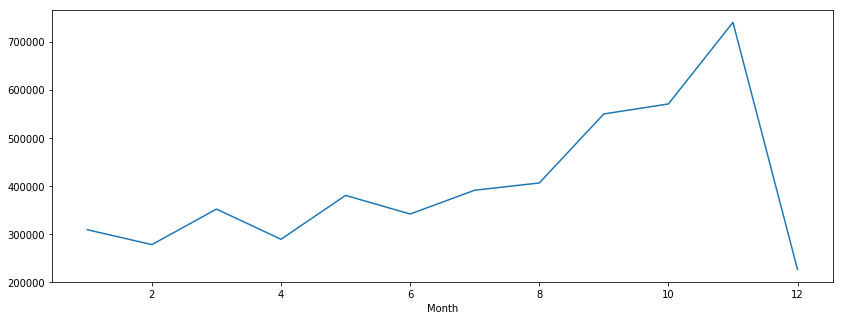

In [58]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [14,5]

sales[sales.Year == 2011].groupby('Month')['quantity sold'].sum().plot('line') ### Total sales are increasing with some lows across the year

## only 9 days were recorded in december so the graph falls

In [32]:
sales['sale'] = sales['quantity sold'] * sales['unit price']

sales[sales.Year == 2011].groupby('Month')['sale'].sum()

Month
1      560000.260
2      498062.650
3      683267.080
4      493207.121
5      723333.510
6      691123.120
7      681300.111
8      682680.510
9     1019687.622
10    1070704.670
11    1461756.250
12     433668.010
Name: sale, dtype: float64

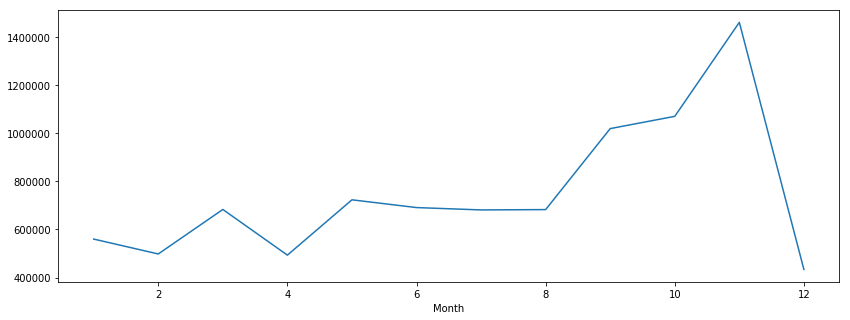

In [59]:


sales[sales.Year == 2011].groupby('Month')['sale'].sum().plot('line') ### Total money made is also increasing with similar pattern

## only 9 days were recorded in december so the graph falls

#### Examine and highlight important trends visible in the sales data and insights.

#### how can we measure our performance in terms of customer acquisition and building customer loyalty?

In [37]:
sales.head(2)

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country,Month,sale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


In [25]:
sales1 = sales.dropna(axis =0)

sales1['customer id'] = sales1['customer id'].astype('int64')

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
sales1.groupby(['customer id','transaction id','Month'])['Month'].count().head(10)

customer id  transaction id  Month
12346        541431          1         1
             C541433         1         1
12347        537626          12       31
             542237          1        29
             549222          4        24
             556201          6        18
             562032          8        22
             573511          10       47
             581180          12       11
12348        539318          12       17
Name: Month, dtype: int64

In [48]:
sales1.head(2)

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country,Month,sale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,20.34


In [100]:
cus={}
acq = {}
for i in range(13):
    if i == 0:
        cus['2010 intial cust - '] = sales[(sales.Year == 2010) & (sales.Month == 12)]['customer id'].unique()
        acq['2010 customers'] = len(cus['2010 intial cust - '])
    else:
        cus[i] = sales[(sales.Year == 2011) & (sales.Month == i)]['customer id'].unique()
        if (i>1) & (i <10):
            acq['2011 new cust in month - ' + str(i)] = len([c for c in cus[i] if c not in cus[i-1]])
        elif i>9:
            acq['2011 new cust in month = ' + str(i)] = len([c for c in cus[i] if c not in cus[i-1]])
        else:
            acq['2011 new cust in month = ' + str(i)] = len([c for c in cus[i] if c not in cus['2010 intial cust - ']])

In [101]:
acq

{'2010 customers': 949,
 '2011 new cust in month - 2': 500,
 '2011 new cust in month - 3': 676,
 '2011 new cust in month - 4': 554,
 '2011 new cust in month - 5': 681,
 '2011 new cust in month - 6': 588,
 '2011 new cust in month - 7': 579,
 '2011 new cust in month - 8': 548,
 '2011 new cust in month - 9': 838,
 '2011 new cust in month = 1': 422,
 '2011 new cust in month = 10': 874,
 '2011 new cust in month = 11': 1022,
 '2011 new cust in month = 12': 244}

In [36]:
### customer loyalty
## inactive users

inac = []
sales2011 = sales1[sales1.Year == 2011]
for cust in sales2011['customer id'].unique():

    fp  = min(sales2011[sales2011['customer id'] == cust].groupby(['transaction id'])['transaction timestamp'].min())
    lp = max(sales2011[sales2011['customer id'] == cust].groupby(['transaction id'])['transaction timestamp'].max())
        
    if fp == lp:
        inac.append(cust)
    elif 12 - lp.month >3:
        inac.append(cust)
    else:
        pass

In [38]:
## INACTIVE CUSTOMERS

len(inac)

1890

In [63]:
sales1 = sales.dropna()

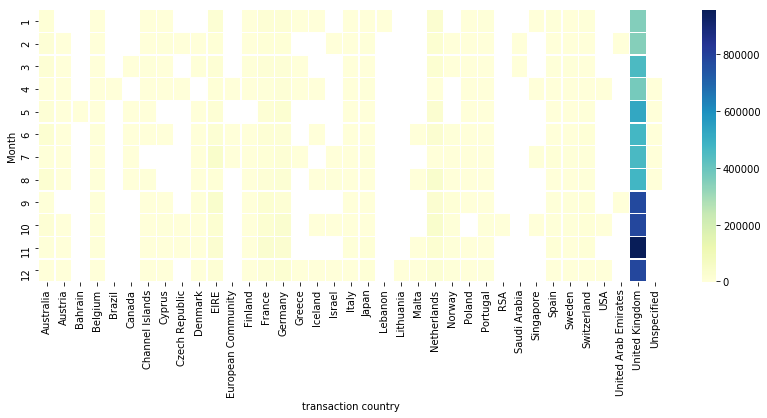

In [90]:
plt.rcParams['figure.figsize'] = [14,5]
req_data = sales1[['transaction country','Month','sale']].groupby(['transaction country','Month'])['sale'].sum().reset_index()
required = req_data.pivot('Month','transaction country','sale')

index_order = [1,2,3,4,5,6,7,8,9,10,11,12]

reuired_new = required.reindex(index_order)
sb.heatmap(reuired_new,cmap='YlGnBu',annot=False,fmt='.05f',linewidth=.4)



In [144]:
def st(df):
    if df[0] == 'C':
        return 'cancelled'
    else:
        return 'Sold'

In [145]:
sales['status'] = sales['transaction id'].apply(lambda x: st(str(x)))

In [175]:
s1 = sales[sales['status']=='Sold'][['product id','product description','quantity sold']]
s1.head(2)

,product id,product description,quantity sold
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,71053,WHITE METAL LANTERN,6


In [177]:
s1['quantity sold'].sum()

5454024

In [204]:
top10 = s1[['product id','quantity sold']].groupby(['product id'])['quantity sold'].sum().nlargest(10)
#top10 = pd.DataFrame(top10).reset_index()
#top10

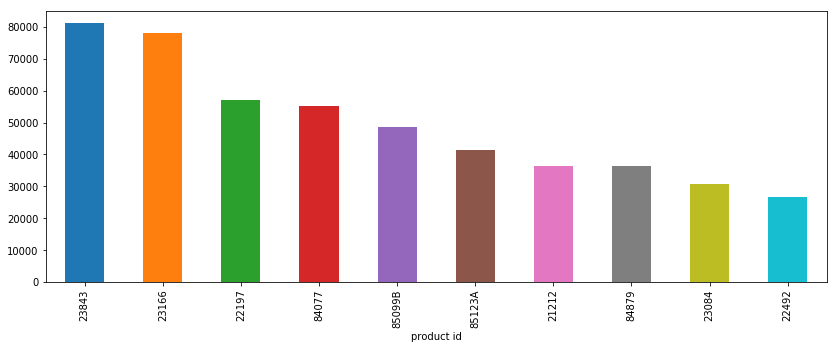

In [205]:
top10.plot.bar()

In [ ]:
#Top 5 customers

In [212]:
sales['customer id'].value_counts().head()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
Name: customer id, dtype: int64

<BarContainer object of 5 artists>

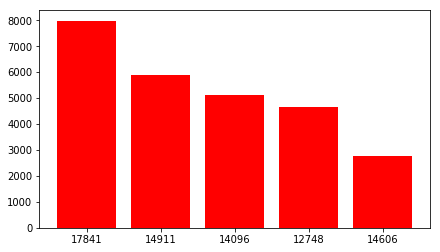

In [223]:
d1 = pd.DataFrame(['17841','14911','14096','12748','14606'],[7983,5903,5128,4642,2782],columns=['cust'])
plt.figure(figsize=(7,4))
plt.bar(d1.cust,d1.index,color='#ff0000')

<BarContainer object of 13 artists>

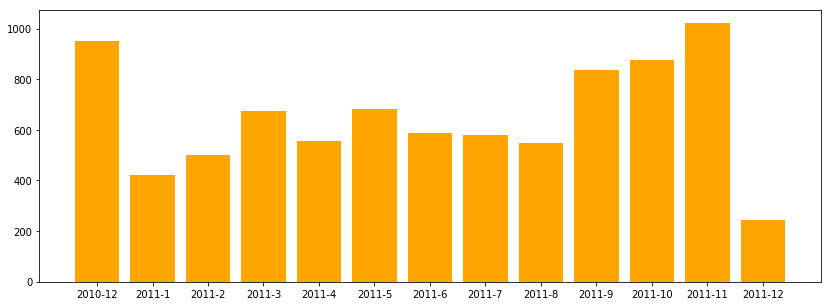

In [230]:
d2 = pd.DataFrame(['2010-12','2011-1','2011-2','2011-3','2011-4','2011-5','2011-6','2011-7','2011-8','2011-9','2011-10','2011-11','2011-12'],
[949,422,500,676,554,681,588,579,548,838,874,1022,244],columns=['year_month'])
plt.bar(d2.year_month,d2.index,color='orange')

In [241]:
len(sales['transaction country'].unique())

38

In [242]:
print(sales.isnull().sum())

transaction id                0
product id                    0
product description        1454
quantity sold                 0
transaction timestamp         0
unit price                    0
customer id              135080
transaction country           0
Month                         0
Year                          0
Day                           0
sale                          0
status                        0
dtype: int64


In [244]:
.describe()

,quantity sold,unit price,customer id,Month,Year,Day,sale
count,541909.000000,541909.000000,406829.000000,541909.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.690570,7.553128,2010.921609,15.023096,17.987795
std,218.081158,96.759853,1713.600303,3.509055,0.268787,8.664063,378.810824
min,-80995.000000,-11062.060000,12346.000000,1.000000,2010.000000,1.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,5.000000,2011.000000,7.000000,3.400000
50%,3.000000,2.080000,15152.000000,8.000000,2011.000000,15.000000,9.750000
75%,10.000000,4.130000,16791.000000,11.000000,2011.000000,22.000000,17.400000
max,80995.000000,38970.000000,18287.000000,12.000000,2011.000000,31.000000,168469.600000
